# Equations of sizing scenarios

*Written by Marc Budinger, INSA Toulouse, France*

We will implement here the sizing scenarios equations of the DC/DC converter.


### Main sizing scenario

To conservatively design the equipment, we will assume that the converter must be able to continuously support the worst operating point in boost charge or discharge.

This boost charge, with an objective duration of 10 s, corresponds to the recharge of a flat path of 400 m. It is assumed that on this path the difference in height between stations is zero and that all of the kinetic energy is recovered during braking. It will also be assumed that the charges or discharges will be done at constant power. For a longer distance, we will accept a charging time longer than 10 s. 


Summary of the data needed for the calculations:
- distance between 2 totems $d$ = 400 m

- bus mass $m$ = 20 t
- [Rolling coefficient](http://en.wikipedia.org/wiki/Rolling_resistance) tires $C_{rr} = 0.01$

- DC bus voltage $U_{dc}$ = 150 V
- number of module $N_m$ = 8
- Ultracapacitor module maximum voltage $V_{max}$ = 125 V 
- Ultracapacitor module minimum voltage $V_{min}$ = 62.5 V

> Exercice: Explain and calculate (with python) the specifications (max power, max input/output current) of the DC/DC converter. 

In [29]:
# Parameters
U_dc=150 # [V] DC bus voltage
V_max=125. # [V] max Ultra-Capacitor voltage
V_min=62.5 # [V] min Ultra-Capacitor voltage
m=20e3 # [kg] bus mass
d=400. # [m] distance
h=3. # [m] rise height
C_rr= 0.01 # [-] tyre rolling coef
g=9.81 # [m/s²] gravity acceleration
t=10 # [s] boost charge duration
N=8 # [-] number of modules

# Energies & works calculations
E_c=m*g*C_rr*d # [J] friction work of rolling coef

print("Travel energy     : %.2g J"%(E_c))

# Power charge or discharge per module
P = E_c/t/N

print("Boost charge power per module     : %.2g W"%(P))
print("DC/DC converter, current DC bus side : %.1f A"%(P/U_dc))
print("DC/DC converter, max Current ultracapacitor module : %.1f A"%(P/V_min))


Travel energy     : 7.8e+05 J
Boost charge power per module     : 9.8e+03 W
DC/DC converter, current DC bus side : 65.4 A
DC/DC converter, max Current ultracapacitor module : 157.0 A


### Sizing scenarios of DC/DC converter components

The following figures illustrates the main components of the DC/DC converter of one ultracapicitor module.

*DC/DC converter diagram*
![DCDCconverter_diagram](pictures/DCDCconverter_diagram.png)

The objective now is to determine the characteristic equations of the sizing scenarios of the different components.

#### Current and voltage ripples equations

The inductor, on the ultracapacitor side,  limits the current ripple. The capacitor, on the DC bus side, limits the voltage ripple. The following figures represent the transient evolution of currents and voltages.

*Current temporal evolution*
![CurrentRipple](pictures/CurrentRipple.png)

*Voltage temporal evolution*
![VoltageRipple](pictures/VoltageRipple.png)

Show that current ripple and voltage ripple can be expressed by the following relations:

$\Delta I=\frac{E(1-\alpha)\alpha T}{L}$

and

$\Delta V=\frac{I_{max}(1-\alpha)\alpha T}{C}$

> Exercice: Plot the evolution of the voltage and current ripples as a function of the duty cycle. What is the most critical operating point?

For following calculations, this critical duty cycle will be assumed.

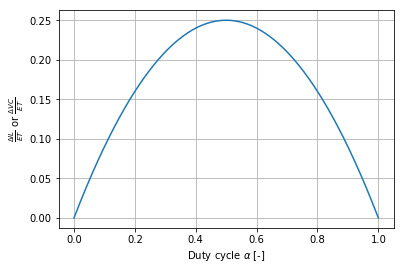

The critical duty cycle is : 0.50


In [30]:
import matplotlib.pyplot as plt
import numpy as np

alpha=np.linspace(0,1,1000)
ripple=alpha*(1-alpha)
plt.plot(alpha,ripple)  
plt.xlabel(r'Duty cycle $\alpha$ [-]')
plt.ylabel(r'$\frac{\Delta IL}{ET}$ or $\frac{\Delta VC}{ET}$')
plt.grid()
plt.show()

print('The critical duty cycle is : %.2f'%(alpha[np.argmax(ripple)]))

#### Components losses 

The following table summarizes the equations which enable to calculate losses in the main components of the converter.

|   	| Inductor  	| IGBT  	| Diode  	| DC Capacitor  	|
|---------------------	|---------------------		|---------------------		|---------------------		|---------------------		|
| Mean current  	| $I_L$  	|  $\alpha I_L$   	|   $(1-\alpha)I_L$  	|   0	|
| RMS current  	| $I_{L,RMS}$  	|  $\sqrt{\alpha } I_{L,RMS}$ 	|  $\sqrt{1-\alpha } I_{L,RMS}$ 	| $\sqrt{\alpha \left(1-\alpha \right)} I_{L,RMS}$  	|
| Conduction losses   	|  $R_{L}I_{RMS}^{2}$ 	|  ${V_{0}}{I_{mean}}+R_{0}I_{RMS}^{2}$ 	| ${V_{0}}{I_{mean}}+R_{0}I_{RMS}^{2}$   	| $R_{S}I_{RMS}^{2}$  	|
| Commutation losse  	|  0 	|  $f(E_{on}+E_{off})$ 	| $\frac{1}{8} f I_{RM} E t_{rr}$  	|  0 	|

with : $I_{L,RMS}=I_{L}\sqrt{1+\frac{1}{12}\left(\frac{\Delta I_{L}}{I_{L}}\right)^{2}}$

> Exercice : Explain how mean and RMS current are calculated for these components. Give modeling assumptions.


#### Components temperatures




Estimation of the hot spot temperature of the various components is important during the sizing of a converter. It is possible to use for this nodal approaches as Figure below.

*Nodal thermal model*
![ThermalModel](pictures/ThermalNetwork.png)

> Exercice : Calculate the temperature of IGBT, Diode, inductor and capacitor for the following configuration.
